In [1]:
import os, sys, json
src_path = os.path.abspath(os.path.join(".."))
if src_path not in sys.path:
    sys.path.append(src_path)

import numpy as np
import matplotlib.pyplot as plt
from src.image_processor import default_image_transform
from src.config import CaptionConfig
from src.data_loader import CaptionDataManager
from src.image_processor import train_transform
from src.base_experiment import plot_eval
import math

import torch
import torch.optim as optim

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from collections import defaultdict
data = defaultdict(dict)

Y_test = [x**2 for x in range(20)]
Y_train = [math.sqrt(x) for x in range(20)]
Y_val = [x for x in range(20)]

data['loss']['train'] = Y_train
data['loss']['test'] = Y_test
data['loss']['val'] = Y_val



In [3]:
# plot_eval(data, 'train', name='loss')
# plot_eval(data, 'test', name='loss')
# plot_eval(data, 'val', name='loss')

In [4]:
config_path = os.path.join(src_path, "src","config.yml") 
print(config_path)
assert(os.path.exists(config_path))

manager = CaptionDataManager(config_path, n_sample=100)

print(manager)

/Users/nsimsiri/Documents/code/ml/nlp/cap/src/config.yml
loading annotations into memory...


100%|██████████| 100/100 [00:00<00:00, 2747.62it/s]

Done (t=0.32s)
creating index...
index created!
loaded - val captions






Loaded {} samples 100


#  Experiments

In [6]:
from src.models.base_model import EncoderDecoder

vocab_size      = len(manager.vocab())
embed_size      = 32
hidden_size     = 64
num_layers      = 1

num_epochs      = 30
learning_rate   = 0.001


print("HYPER-PARAM[vocab={} embed={} hidden={} num_layers={} ]".format(vocab_size, 
                                                                       embed_size, 
                                                                       hidden_size,
                                                                       num_layers))
net = EncoderDecoder(vocab_size, 
                     embed_size=embed_size, 
                     hidden_size=hidden_size,
                     num_layers=num_layers)

total_param_count = sum(param.numel() for param in net.parameters())
decoder_param_count = sum(param.numel() for param in net.decoder.parameters())
print("total param #: " + str(total_param_count))
print("decoder param #: " + str(decoder_param_count))

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)


HYPER-PARAM[vocab=425 embed=32 hidden=64 num_layers=1 ]
total param #: 131945
decoder param #: 66313


ep=0 step=2 loss=1.770801305770874
ep=0 step=4 loss=1.72777259349823
ep=0 step=6 loss=1.7539451917012532
ep=0 step=8 loss=1.7678215354681015


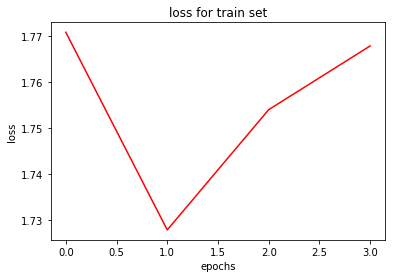

	 time elasped for epoch: 30.918588161468506
ep=1 step=2 loss=1.7536959052085876
ep=1 step=4 loss=1.7437014877796173
ep=1 step=6 loss=1.7365326682726543
ep=1 step=8 loss=1.731514424085617


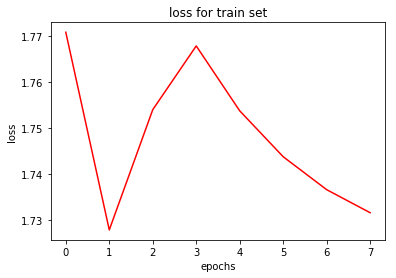

	 time elasped for epoch: 30.24034810066223
ep=2 step=2 loss=1.714336633682251
ep=2 step=4 loss=1.745956301689148
ep=2 step=6 loss=1.7080127994219463
ep=2 step=8 loss=1.6984659880399704


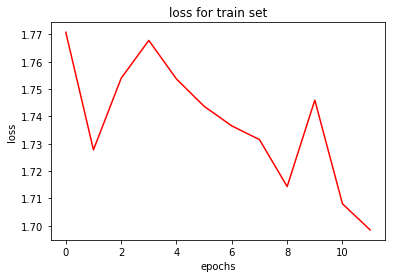

	 time elasped for epoch: 30.231420755386353
ep=3 step=2 loss=1.8691487908363342
ep=3 step=4 loss=1.7556557357311249
ep=3 step=6 loss=1.7310564319292705
ep=3 step=8 loss=1.7244350165128708


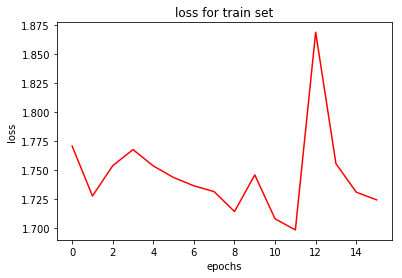

	 time elasped for epoch: 30.298329830169678
ep=4 step=2 loss=1.674856185913086
ep=4 step=4 loss=1.6537613570690155
ep=4 step=6 loss=1.6699670553207397
ep=4 step=8 loss=1.66056227684021


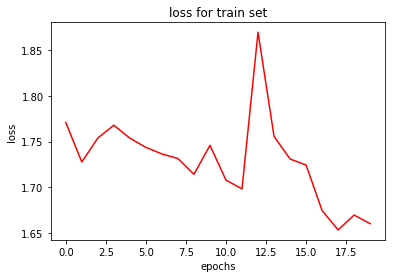

	 time elasped for epoch: 30.366579294204712
ep=5 step=2 loss=1.6326437592506409
ep=5 step=4 loss=1.6480132341384888
ep=5 step=6 loss=1.661639928817749
ep=5 step=8 loss=1.6532641500234604


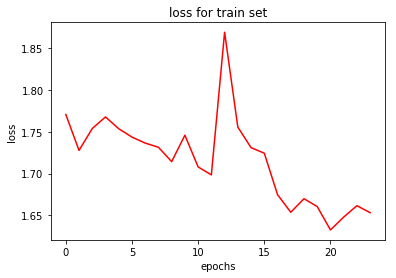

	 time elasped for epoch: 30.835464000701904
ep=6 step=2 loss=1.6450352668762207
ep=6 step=4 loss=1.6389916837215424
ep=6 step=6 loss=1.6370465358098347
ep=6 step=8 loss=1.6334556639194489


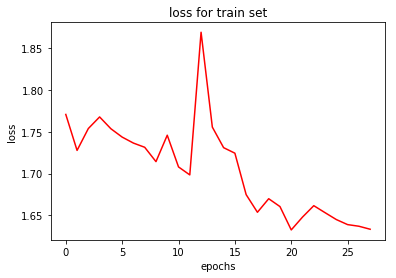

	 time elasped for epoch: 30.6550452709198
ep=7 step=2 loss=1.62216317653656
ep=7 step=4 loss=1.658790498971939
ep=7 step=6 loss=1.6273808876673381
ep=7 step=8 loss=1.6142421960830688


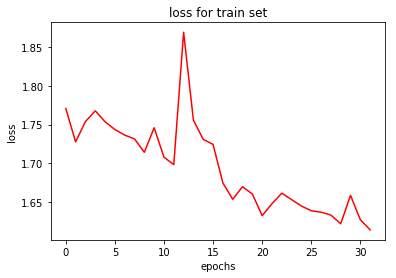

	 time elasped for epoch: 30.49536919593811
ep=8 step=2 loss=1.5874741673469543
ep=8 step=4 loss=1.5592449605464935
ep=8 step=6 loss=1.579007128874461
ep=8 step=8 loss=1.5863880515098572


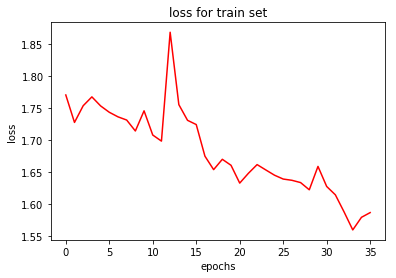

	 time elasped for epoch: 30.879244089126587
ep=9 step=2 loss=1.5555678606033325
ep=9 step=4 loss=1.5306454598903656
ep=9 step=6 loss=1.5482782522837322
ep=9 step=8 loss=1.5588117241859436


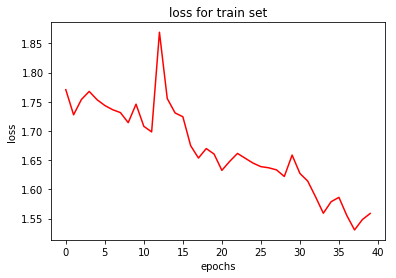

	 time elasped for epoch: 30.23207688331604
ep=10 step=2 loss=1.534045159816742
ep=10 step=4 loss=1.5331518352031708
ep=10 step=6 loss=1.5293971300125122
ep=10 step=8 loss=1.5472817122936249


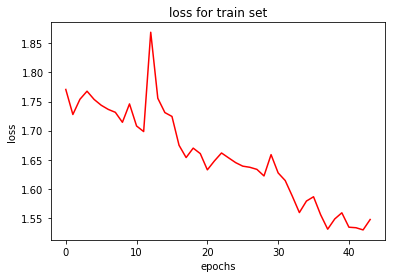

	 time elasped for epoch: 29.523361921310425
ep=11 step=2 loss=1.4911804795265198
ep=11 step=4 loss=1.5014227330684662
ep=11 step=6 loss=1.5250373482704163
ep=11 step=8 loss=1.5262530893087387


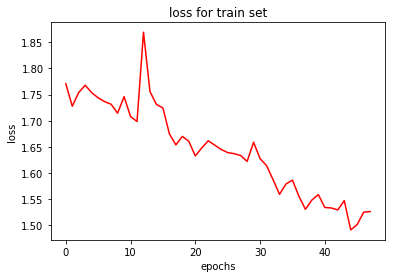

	 time elasped for epoch: 29.529149055480957
ep=12 step=2 loss=1.5057823657989502
ep=12 step=4 loss=1.483455628156662
ep=12 step=6 loss=1.5130666693051655
ep=12 step=8 loss=1.5087188184261322


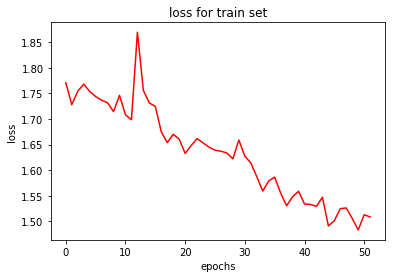

	 time elasped for epoch: 30.426785230636597
ep=13 step=2 loss=1.5079546570777893
ep=13 step=4 loss=1.5068148076534271
ep=13 step=6 loss=1.4902844627698262
ep=13 step=8 loss=1.4984605610370636


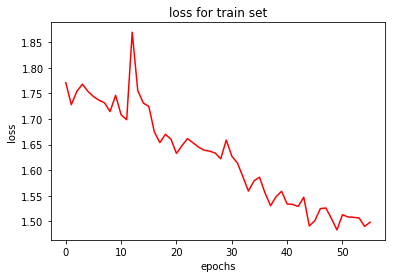

	 time elasped for epoch: 30.080963850021362
ep=14 step=2 loss=1.4912797212600708
ep=14 step=4 loss=1.4665240049362183
ep=14 step=6 loss=1.481113572915395
ep=14 step=8 loss=1.478952869772911


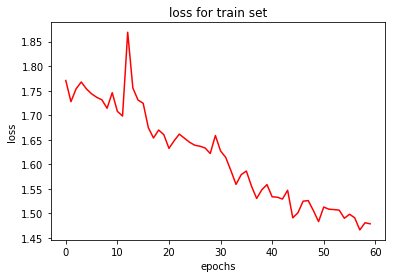

	 time elasped for epoch: 29.995182037353516
ep=15 step=2 loss=1.505405306816101
ep=15 step=4 loss=1.4623278677463531
ep=15 step=6 loss=1.4527087807655334
ep=15 step=8 loss=1.4572097659111023


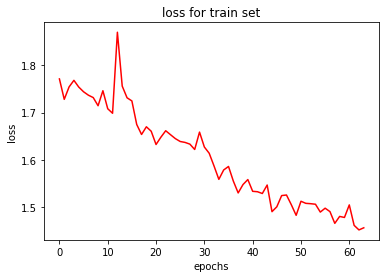

	 time elasped for epoch: 29.96332311630249
ep=16 step=2 loss=1.453136384487152
ep=16 step=4 loss=1.429902970790863
ep=16 step=6 loss=1.4330354531606038
ep=16 step=8 loss=1.442460834980011


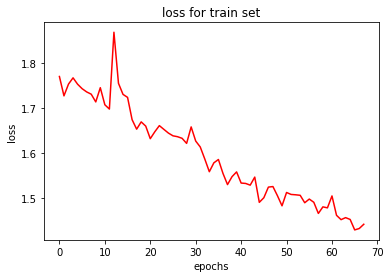

	 time elasped for epoch: 30.093957901000977
ep=17 step=2 loss=1.4669647216796875
ep=17 step=4 loss=1.4464051127433777
ep=17 step=6 loss=1.4552353620529175
ep=17 step=8 loss=1.4385599941015244


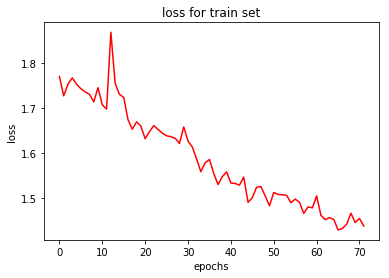

	 time elasped for epoch: 30.157578229904175
ep=18 step=2 loss=1.4052549600601196
ep=18 step=4 loss=1.4119752645492554
ep=18 step=6 loss=1.4131910006205242
ep=18 step=8 loss=1.4175648987293243


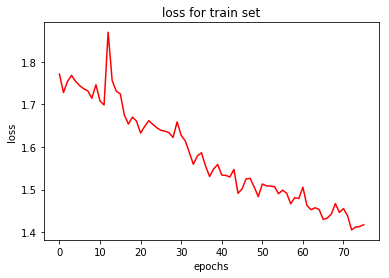

	 time elasped for epoch: 29.85030484199524
ep=19 step=2 loss=1.3761582374572754
ep=19 step=4 loss=1.3907303214073181
ep=19 step=6 loss=1.3852521777153015
ep=19 step=8 loss=1.4013835042715073


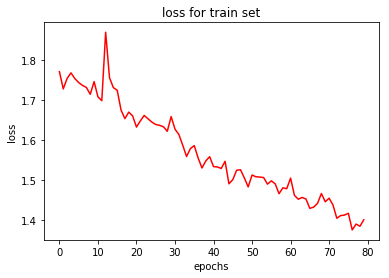

	 time elasped for epoch: 30.518521070480347
ep=20 step=2 loss=1.4049090147018433
ep=20 step=4 loss=1.3811798691749573
ep=20 step=6 loss=1.371033489704132
ep=20 step=8 loss=1.3755960166454315


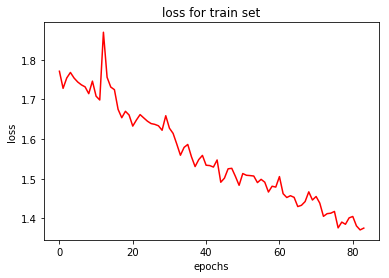

	 time elasped for epoch: 32.464191198349
ep=21 step=2 loss=1.3201688528060913
ep=21 step=4 loss=1.3410655856132507
ep=21 step=6 loss=1.3456460038820903
ep=21 step=8 loss=1.3434513211250305


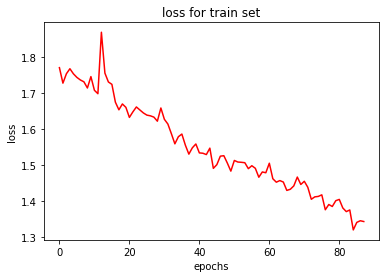

	 time elasped for epoch: 40.99184489250183
ep=22 step=2 loss=1.2968279719352722
ep=22 step=4 loss=1.31615549325943
ep=22 step=6 loss=1.3124637405077617
ep=22 step=8 loss=1.326836258172989


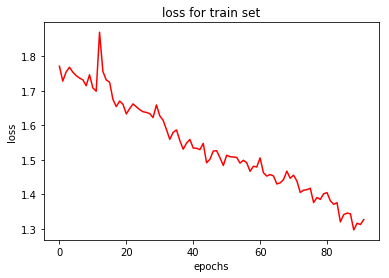

	 time elasped for epoch: 32.84528398513794
ep=23 step=2 loss=1.3114705681800842
ep=23 step=4 loss=1.3143423795700073
ep=23 step=6 loss=1.3126625617345173
ep=23 step=8 loss=1.320524126291275


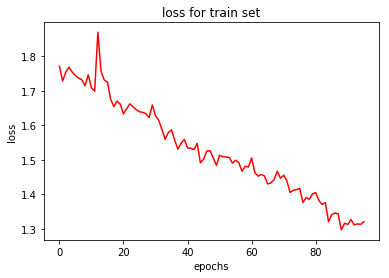

	 time elasped for epoch: 31.41649889945984
ep=24 step=2 loss=1.2622752785682678
ep=24 step=4 loss=1.2697210907936096
ep=24 step=6 loss=1.280676245689392
ep=24 step=8 loss=1.3295614570379257


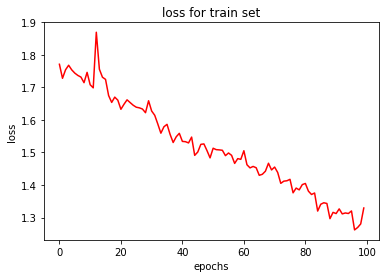

	 time elasped for epoch: 32.20380401611328
ep=25 step=2 loss=1.2834917306900024
ep=25 step=4 loss=1.2913771569728851
ep=25 step=6 loss=1.2787259419759114
ep=25 step=8 loss=1.3301949352025986


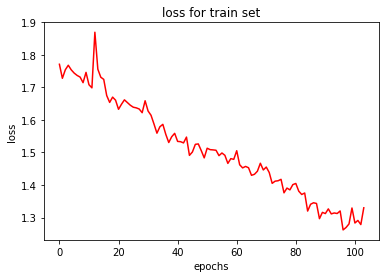

	 time elasped for epoch: 31.474735975265503
ep=26 step=2 loss=1.2908323407173157
ep=26 step=4 loss=1.2775740325450897
ep=26 step=6 loss=1.2633143067359924
ep=26 step=8 loss=1.2654970288276672


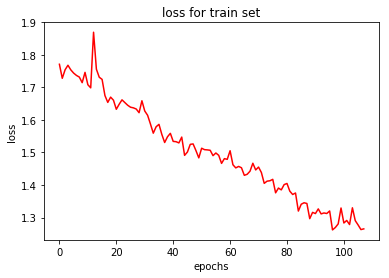

	 time elasped for epoch: 31.288506984710693
ep=27 step=2 loss=1.238492727279663
ep=27 step=4 loss=1.2558403313159943
ep=27 step=6 loss=1.2572174866994221
ep=27 step=8 loss=1.2649831473827362


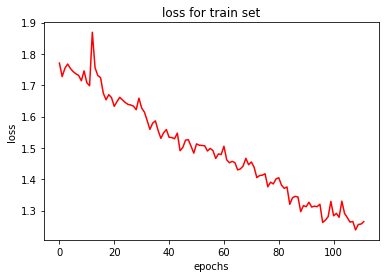

	 time elasped for epoch: 35.71003794670105
ep=28 step=2 loss=1.2466792464256287
ep=28 step=4 loss=1.2360162734985352
ep=28 step=6 loss=1.2344146768252056
ep=28 step=8 loss=1.2539079189300537


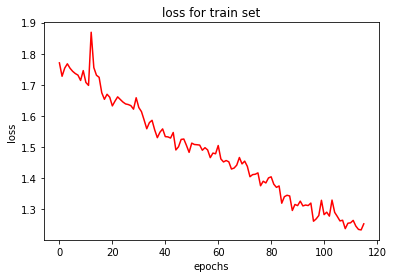

	 time elasped for epoch: 30.244590759277344
ep=29 step=2 loss=1.2463752627372742
ep=29 step=4 loss=1.2583469152450562
ep=29 step=6 loss=1.2383271257082622
ep=29 step=8 loss=1.2409250140190125


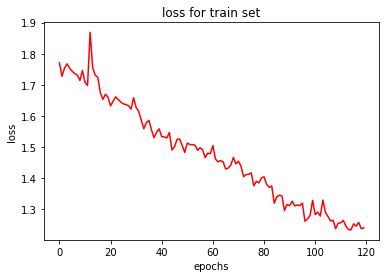

	 time elasped for epoch: 31.214878797531128
ep=30 step=2 loss=1.2369781136512756
ep=30 step=4 loss=1.2173274755477905
ep=30 step=6 loss=1.2083244323730469
ep=30 step=8 loss=1.208830326795578


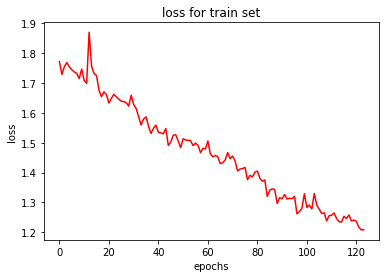

	 time elasped for epoch: 30.4951651096344
ep=31 step=2 loss=1.2313063740730286
ep=31 step=4 loss=1.211429387331009
ep=31 step=6 loss=1.1872774958610535
ep=31 step=8 loss=1.1901532858610153


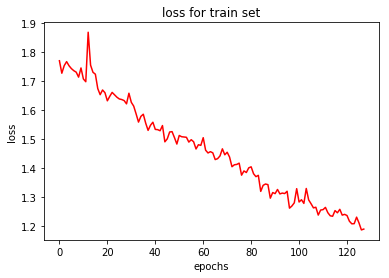

	 time elasped for epoch: 31.705121994018555
ep=32 step=2 loss=1.1558626294136047
ep=32 step=4 loss=1.1759408712387085
ep=32 step=6 loss=1.1796225905418396
ep=32 step=8 loss=1.1874240636825562


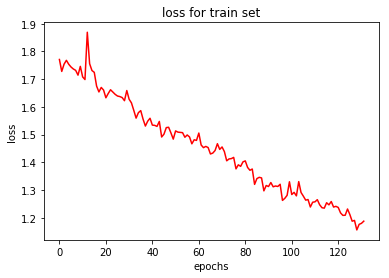

	 time elasped for epoch: 29.810014963150024
ep=33 step=2 loss=1.15570068359375
ep=33 step=4 loss=1.173123151063919
ep=33 step=6 loss=1.1729028423627217
ep=33 step=8 loss=1.188084438443184


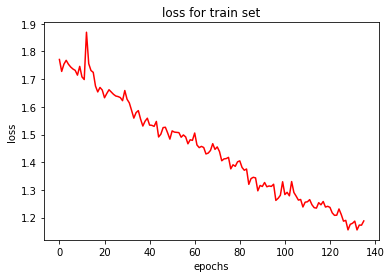

	 time elasped for epoch: 31.01280403137207
ep=34 step=2 loss=1.102667510509491
ep=34 step=4 loss=1.1418122947216034
ep=34 step=6 loss=1.1263107061386108
ep=34 step=8 loss=1.1428772062063217


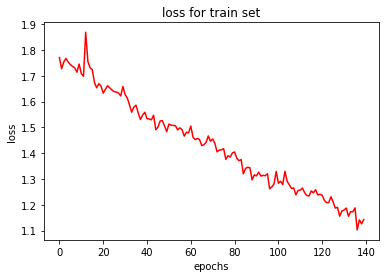

	 time elasped for epoch: 30.724262714385986
ep=35 step=2 loss=1.1458900570869446
ep=35 step=4 loss=1.146936297416687
ep=35 step=6 loss=1.1615476409594219
ep=35 step=8 loss=1.1567673981189728


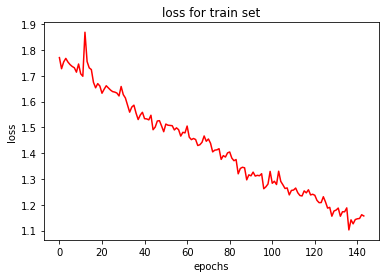

	 time elasped for epoch: 30.76044011116028
ep=36 step=2 loss=1.101264774799347
ep=36 step=4 loss=1.100313514471054
ep=36 step=6 loss=1.0940633217493694
ep=36 step=8 loss=1.1082921922206879


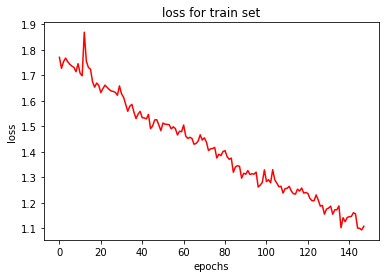

	 time elasped for epoch: 31.38302183151245
ep=37 step=2 loss=1.0771440863609314
ep=37 step=4 loss=1.0978960990905762
ep=37 step=6 loss=1.0943756699562073
ep=37 step=8 loss=1.0958238542079926


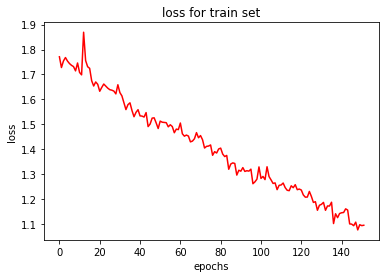

	 time elasped for epoch: 28.90379285812378
ep=38 step=2 loss=1.0888823866844177
ep=38 step=4 loss=1.0945657789707184
ep=38 step=6 loss=1.0846429268519084
ep=38 step=8 loss=1.0765691697597504


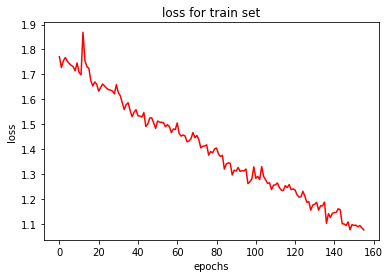

	 time elasped for epoch: 29.31206226348877
ep=39 step=2 loss=1.0431123971939087
ep=39 step=4 loss=1.062963843345642
ep=39 step=6 loss=1.0675130287806194
ep=39 step=8 loss=1.0620691925287247


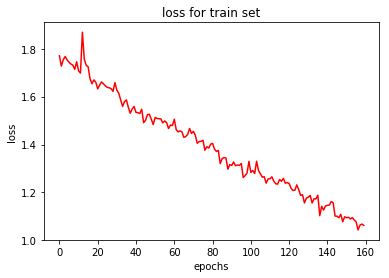

	 time elasped for epoch: 29.26148295402527
ep=40 step=2 loss=1.0128485560417175
ep=40 step=4 loss=1.0279726088047028
ep=40 step=6 loss=1.039581338564555
ep=40 step=8 loss=1.0462459027767181


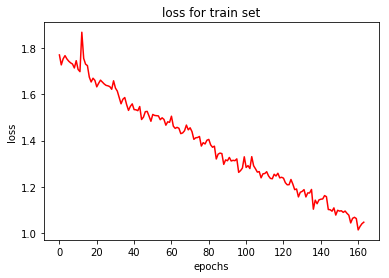

	 time elasped for epoch: 30.78663206100464
ep=41 step=2 loss=1.0229933857917786
ep=41 step=4 loss=1.013684704899788
ep=41 step=6 loss=1.0280872682730358
ep=41 step=8 loss=1.030533991754055


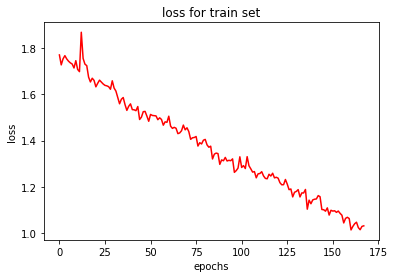

	 time elasped for epoch: 32.33652186393738
ep=42 step=2 loss=1.0235812664031982
ep=42 step=4 loss=1.0345295667648315
ep=42 step=6 loss=1.0354909499486287
ep=42 step=8 loss=1.084042802453041


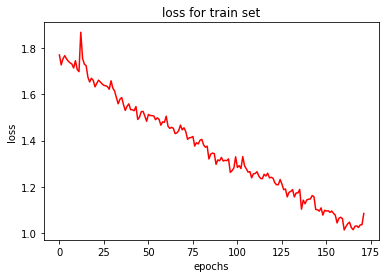

	 time elasped for epoch: 29.682928800582886
ep=43 step=2 loss=0.967936635017395
ep=43 step=4 loss=0.9966997802257538
ep=43 step=6 loss=0.9997401237487793
ep=43 step=8 loss=1.0456192791461945


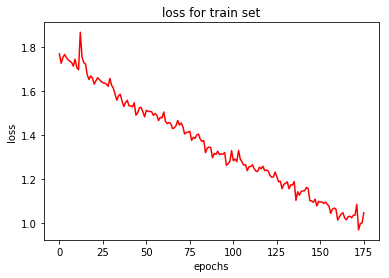

	 time elasped for epoch: 30.251153707504272
ep=44 step=2 loss=0.9895937740802765
ep=44 step=4 loss=1.0375360995531082
ep=44 step=6 loss=1.026622861623764
ep=44 step=8 loss=1.023509494960308


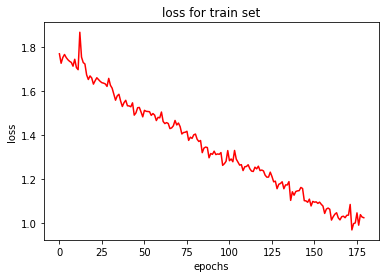

	 time elasped for epoch: 30.4656081199646
ep=45 step=2 loss=0.9455463886260986
ep=45 step=4 loss=0.9666071385145187
ep=45 step=6 loss=0.9707649151484171
ep=45 step=8 loss=0.9800473600625992


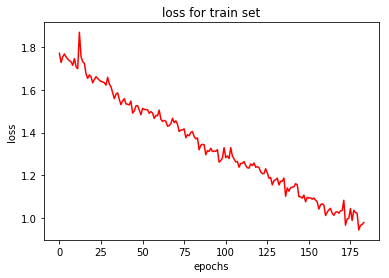

	 time elasped for epoch: 31.00459909439087
ep=46 step=2 loss=1.003579556941986
ep=46 step=4 loss=0.9962099492549896
ep=46 step=6 loss=1.0081265767415364
ep=46 step=8 loss=0.9828831404447556


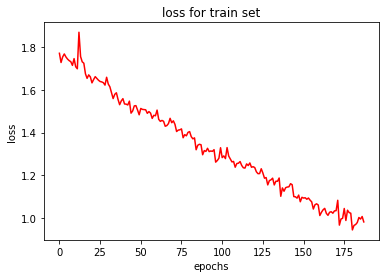

	 time elasped for epoch: 29.648111820220947
ep=47 step=2 loss=0.911745548248291
ep=47 step=4 loss=0.9839465320110321
ep=47 step=6 loss=0.9920351902643839
ep=47 step=8 loss=0.9884848073124886


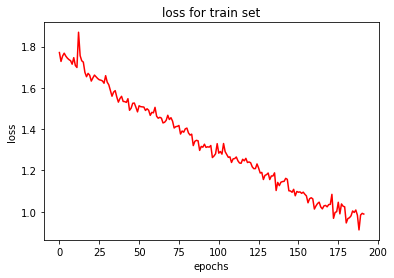

	 time elasped for epoch: 30.17288613319397
ep=48 step=2 loss=0.9148527979850769
ep=48 step=4 loss=0.9397128522396088
ep=48 step=6 loss=0.9472586810588837
ep=48 step=8 loss=0.9379013404250145


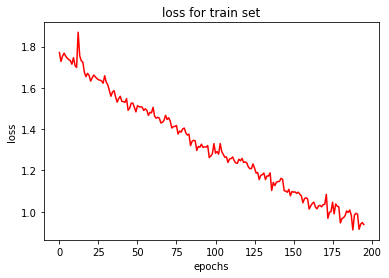

	 time elasped for epoch: 29.702208042144775
ep=49 step=2 loss=0.9501453340053558
ep=49 step=4 loss=0.9390601515769958
ep=49 step=6 loss=0.9411611258983612
ep=49 step=8 loss=0.935845285654068


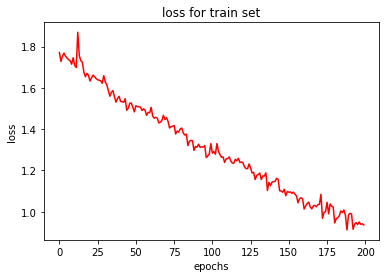

	 time elasped for epoch: 29.246950149536133


In [29]:
from src.image_processor import train_transform, default_image_transform
from src.base_experiment import plot_eval, run_model
import time 
train_loader = manager.build_dataloader('train', 
                                        batch_size=10, 
                                        shuffle=True, 
#                                         image_transform=train_transform)
                                        image_transform=default_image_transform)
# val_loader   = manager.build_dataloader('val', 
#                                         batch_size=5)
# test_loader  = manager.build_dataloader('test', 
#                                         batch_size=5)

all_losses = []
plot_loss_map = {
    'loss': {'train': all_losses}
}
num_epochs = 50
for epoch in range(num_epochs):
    t0 = time.time()
    losses, logged_losses = run_model(net, 
                          train_loader, 
                          criterion, 
                          optimizer,
                          train=True,
                          epoch=epoch)

    all_losses += logged_losses
    plot_eval(plot_loss_map, "train", name='loss')
    print("\t time elasped for epoch: {}".format(time.time()-t0))
    


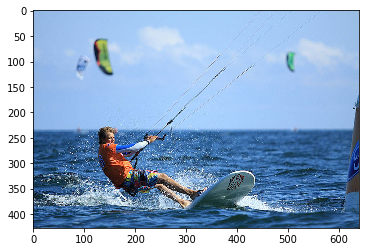

predicted:  <start> a woman skiing down a street . <end>
gold: <start> two people riding parasols are in the background while a man who is riding a jet ski is holding on to a rope . <end>


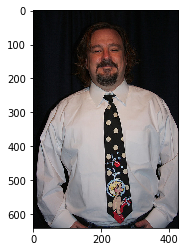

predicted:  <start> two men are in a bathroom by a table . <end>
gold: <start> a man in a white button up shirt with the image of a woman and polka dots on the tie . <end> <pad> <pad> <pad>


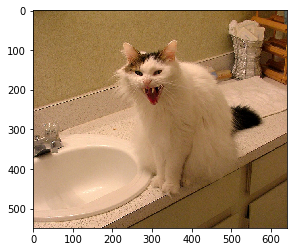

predicted:  <start> a man is holding a tennish racquet . <end>
gold: <start> an angry cat hissing while sitting on a bathroom counter . <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


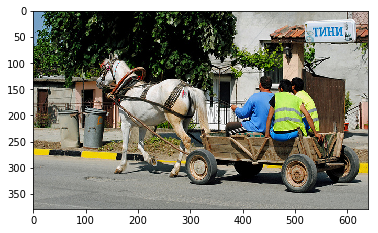

predicted:  <start> a man is holding a tennish racquet while he competes . <end>
gold: <start> a horse pulling a wagon carrying three men . <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


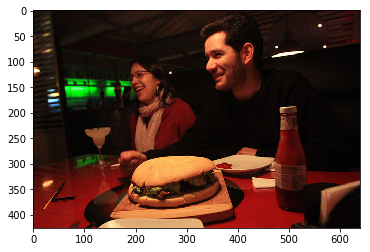

predicted:  <start> a man is holding a tennish racquet while he competes . <end>
gold: <start> two people laughing with a hamburger and drink <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


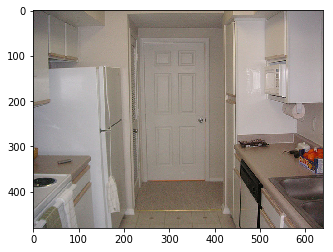

predicted:  <start> two men are in a bathroom by a mirror . <end>
gold: <start> sparse narrow kitchen , used , but neat , all in white . <end>


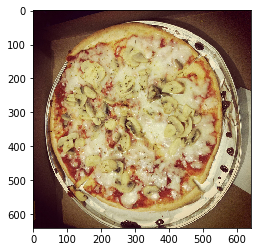

predicted:  <start> a cat sitting on a street . <end>
gold: <start> a pizza with sauce , mushrooms , and cheese on a plate . <end>


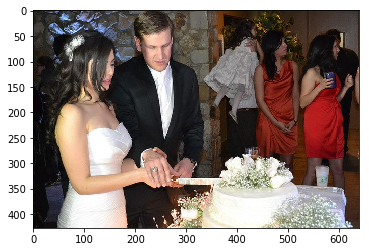

predicted:  <start> a man is holding a tennish racquet . <end>
gold: <start> the bride and the groom are cutting the wedding cake . <end> <pad> <pad>


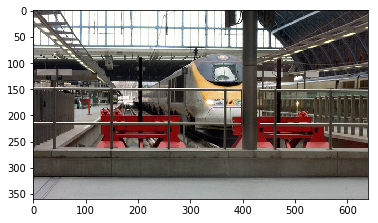

predicted:  <start> three stop lights and a street with chocolate on it . <end>
gold: <start> a train pulled into the last stop of a station <end> <pad> <pad> <pad>


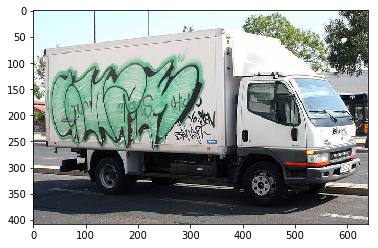

predicted:  <start> a man is standing on a wooden shelter . <end>
gold: <start> the side of the truck is covered with graffiti . <end> <pad> <pad> <pad>


In [34]:
from src.base_experiment import evaluate_model
val_loader   = manager.build_dataloader('val', 
                                        batch_size=5)
# evaluate_model(net, train_loader, criterion, manager)
evaluate_model(net, val_loader, criterion, manager)

In [ ]:
losses, _ = run_model(net, 
                      train_loader, 
                      criterion, 
                      optimizer,
                      train=True,
                      epoch=epoch)